In [1]:
# Import dependencies
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mappper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.ext.declarative import declarative_base

In [3]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [7]:
# Create our session (link) from Python to the Database
session = Session(bind=engine)

# Exploratory Climate Analysis

In [8]:
# Display column labels from table measurement
measurement_table = engine.execute("SELECT * FROM measurement lIMIT 1")
measurement_table.keys()

['id', 'station', 'date', 'prcp', 'tobs']

In [9]:
# Display column labels from table station
station_table = engine.execute("SELECT * FROM station lIMIT 1")
station_table.keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [29]:
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

/Users/sherman/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


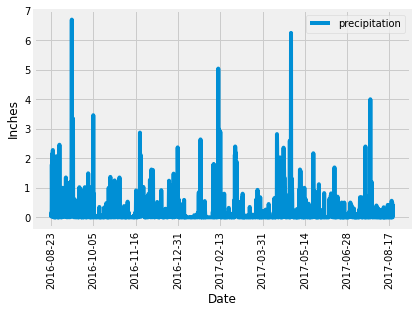

In [10]:
# Design a query to retrieve the last 12 months of precipatation data and plot the results

# Query the first date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the data 1 year ago from the last data point in the database
last_date = dt.date(2017,8,23)
query_date = last_date - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipation scores
annual_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date <= last_date, Measurement.date >= query_date).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(annual_prcp, columns=['date','prcp'])


# Sort the dataframe by date
df_sort = df.set_index('date').sort_values(by='date', ascending=True).dropna()


# Use Pandas Plotting with Matplotlib to plot the data
df_sort.plot() 
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Inches')
plt.legend(['precipitation'])
plt.show()



In [11]:
all_temp = [Measurement.date,
            func.max(Measurement.tobs),
            func.min(Measurement.tobs),
            func.avg(Measurement.tobs)]

temp = session.query(*all_temp).all()
temp

[('2013-04-02', 87.0, 53.0, 73.09795396419437)]

In [157]:
# Use pandas to calculate the summary statistics for the precipation data
df_sort.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [ ]:
# Design a query to show how many stations are available in this dataset?
station_table = engine.execute("SELECT * FROM station")
station_table.keys()

session.query(Measurement.station).group_by(Measurement.station).count()

In [158]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the staions and the counts in descending order.

stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
# highest temperature recorded, and average temperature of the  most active station?
station_temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
station_temp

[(54.0, 85.0, 71.66378066378067)]

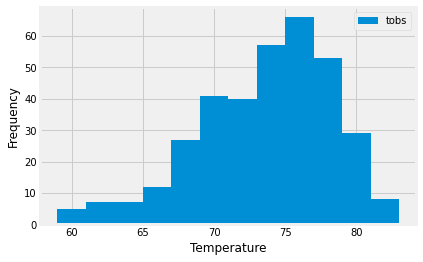

In [14]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_tobs = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date <= last_date, Measurement.date >= query_date).all()

tobs_values = list(np.ravel(station_tobs))
plt.hist(tobs_values,bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.show()

In [15]:
len(tobs_values)

352

In [16]:
session.close()